# Folha de Pagamento

## Definição dos Atributos

**Matricula**: Identificador único de cada funcionário, gerado como um código numérico de 4 dígitos, começando de "0001" até "1000".

**N**ome: Nome fictício do funcionário, no formato "Funcionário N", onde N varia de 1 a 1000. Este campo é meramente representativo.

**Genero**: Categoria de gênero, contendo valores "Masculino", "Feminino" ou "Não Informado", com distribuição aleatória entre os funcionários.

**Departamento**: Setor ao qual o funcionário pertence, distribuído entre as categorias: Financeiro; RH (Recursos Humanos); TI (Tecnologia da Informação); Marketing; Operações. Em alguns registros, valores nulos foram inseridos para simular casos onde o departamento pode não estar especificado.

**Cargo**: Posição ou função do funcionário dentro da empresa, compatível com o departamento. As categorias de cargos são: Analista; Gerente; Assistente; Diretor; Coordenador. Há registros com valores nulos para simular dados incompletos.

**Formacao**: Formação acadêmica do funcionário, relacionada ao departamento Departamentos e suas formações associadas: Financeiro: Contabilidade, Administração, Economia; RH: Psicologia, Administração, Recursos Humanos; TI: Engenharia da Computação, Ciência da Computação, Sistemas de Informação
Marketing: Marketing, Publicidade e Propaganda, Comunicação Social; Operações: Engenharia de Produção, Logística, Administração. Valores nulos foram inseridos para simular lacunas nesses dados.

**Escolaridade**: Nível de escolaridade do funcionário, com categorias que incluem: Ensino Médio; Tecnólogo; Graduação; Pós-graduação; Mestrado. Distribuição aleatória sem relação direta com o cargo ou departamento. Este campo não possui valores nulos.

**Salario_Bruto**: Valor bruto do salário do funcionário, gerado com uma média de RS 5.000,00 e desvio padrão de RS 1.500,00. Mas, inclui alguns valores nulos para simular registros incompletos. Em cerca de 1% dos casos, valores atípicos foram inseridos (outliers), aumentando o salário para até 10 ou 15 vezes o valor original.

Horas_Trabalhadas: Número médio de horas trabalhadas no mês, com média de 160 horas e desvio padrão de 20 horas. Em alguns registros, outliers foram adicionados, aumentando as horas trabalhadas para até 5 ou 10 vezes o valor típico, e valores nulos foram inseridos para simular dados faltantes.

**Bonificacao**: Valor das bonificações recebidas pelos funcionários, com média de RS 500,00 e desvio padrão de RS 200,00. Outliers foram inseridos em cerca de 1% dos casos, aumentando o valor da bonificação em até 3 ou 5 vezes. Há também valores nulos, indicando registros sem informações de bonificação. Algumas bonificações estão com valores negativos devido a política da empresa que caso o funcionário receba a bonificação antecipada ou houve necessidade de corrigir algum valor.

## Pipeline

O pipeline em ciência de dados é uma sequência de etapas estruturadas para coletar, processar, e analisar dados com o objetivo de obter insights e modelos preditivos. Esse fluxo de trabalho organiza e padroniza o processo, aumentando a eficiência e facilitando a manutenção e a escalabilidade dos projetos de ciência de dados.

Etapas comuns:

1. **Coleta de Dados**: Nesta fase, os dados são coletados de diversas fontes, como bancos de dados, APIs, arquivos CSV, entre outros. Essa etapa é crucial para garantir que os dados sejam relevantes e suficientes para o objetivo do projeto.

2. **Pré-processamento**: Aqui, o objetivo é preparar os dados para a análise. Isso inclui limpeza (remover dados inconsistentes ou ausentes), transformação (normalização, padronização) e integração (combinar dados de diferentes fontes).

3. **Exploração e Análise**: Utiliza-se métodos de análise exploratória de dados (EDA) para entender as características dos dados, identificar padrões, verificar distribuições e preparar visualizações iniciais. É uma fase importante para gerar hipóteses e insights preliminares.

4. **Engenharia de Atributos (Feature Engineering)**: Nessa etapa, criam-se novos atributos ou selecionam-se os mais importantes para melhorar a performance dos modelos. Pode incluir operações como codificação de variáveis categóricas, criação de variáveis temporais ou cálculo de interações entre variáveis.

5. **Modelagem**: Consiste em aplicar algoritmos de aprendizado de máquina ou estatística para treinar o modelo com os dados preparados. Essa etapa envolve experimentação com diferentes algoritmos e ajustes de hiperparâmetros para otimizar a performance.

6. **Avaliação**: Após treinar o modelo, ele é testado para avaliar sua precisão, recall, F1-score, entre outras métricas relevantes. Essa etapa ajuda a decidir se o modelo é adequado ou se precisa de ajustes.

7. **Deploy (Implantação)**: Uma vez validado, o modelo é implantado em ambiente de produção. Isso pode envolver a criação de APIs para integração com outras aplicações ou sistemas.

8. **Monitoramento e Manutenção**: Após o deploy, é essencial monitorar a performance do modelo ao longo do tempo, ajustando-o conforme necessário para evitar problemas como o "drift" dos dados ou alterações nas condições do ambiente.

Em ciência de dados, pipelines são altamente customizáveis, podendo ter mais ou menos etapas, dependendo do problema e do contexto.

Etapa 01: Instalar e Importar as Bibliotecas

Etapa 02: Obter o Datasource

Etapa 03: Exibir os Dados, Metadados e Estatísticas

Etapa 04: Extract, Transform, Load (ETL)

Etapa 05: Exploratory Data Analysis (EDA)

Etapa 06: Identificação dos Outliers

Etapa 07: Clusterização

Etapa 08: Rotulagem

Etapa 09: Preprocess

Etapa 10: Balanceamento dos Dados

Etapa 11: Separação dos Dados para Treinamento/Teste e Validação

Etapa 12: Competição dos Modelos

Etapa 13: Teste do Modelo Campeão

## Etapa 1: Instalar e Importar as Bibliotecas

In [1]:
# Importar bibliotecas
try:
  import gdown
except ImportError:
  !pip install gdown
  import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Etapa 2: Obter o Datasource

In [2]:
# Atribuir ID do arquivo no Google Drive
file_id = '10oeSdUKZUbEZqbwtVag89NuzZm-3Fn5V'
dataset_url = f'https://drive.google.com/uc?id={file_id}'

# Definir nome do arquivo
output_path = 'folha.csv'

# Baixar o arquivo usando gdown
gdown.download(dataset_url, output_path, quiet=False)

# Carregar o arquivo CSV em um DataFrame, especificando o separador como ponto-e-vírgula
dataset = pd.read_csv(output_path, sep=';')

Downloading...
From: https://drive.google.com/uc?id=10oeSdUKZUbEZqbwtVag89NuzZm-3Fn5V
To: /content/folha.csv
100%|██████████| 96.9k/96.9k [00:00<00:00, 59.6MB/s]


## Etapa 3: Exibir os Dados, Metadados e Estatísticas

In [3]:
# Explorar os metadados do dataset
print("Exploração dos Metadados do Dataset")

# Exibir o DataFrame
print("Dados do Dataset:")
print(dataset.head().to_string())

Exploração dos Metadados do Dataset
Dados do Dataset:
   Matricula           Nome         Genero Departamento        Cargo                Formacao   Escolaridade  Salario_Bruto  Horas_Trabalhadas  Bonificacao
0          1  Funcionário 1       Feminino    Operações      Diretor  Engenharia de Produção  Pós-graduação            NaN              139.9       315.92
1          2  Funcionário 2       Feminino   Financeiro     Analista           Administração  Pós-graduação        5128.93              117.1       467.94
2          3  Funcionário 3  Não Informado    Marketing   Assistente               Marketing       Mestrado        6127.92              195.9          NaN
3          4  Funcionário 4  Não Informado    Marketing  Coordenador               Marketing      Tecnólogo        5844.48              155.9       199.47
4          5  Funcionário 5  Não Informado    Marketing      Gerente      Comunicação Social      Graduação        3207.52              151.0       318.89


In [4]:
# Obter informações gerais do dataset
print("Informações Gerais do Dataset:")
print(dataset.info())

Informações Gerais do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Matricula          1000 non-null   int64  
 1   Nome               1000 non-null   object 
 2   Genero             1000 non-null   object 
 3   Departamento       900 non-null    object 
 4   Cargo              900 non-null    object 
 5   Formacao           900 non-null    object 
 6   Escolaridade       1000 non-null   object 
 7   Salario_Bruto      900 non-null    float64
 8   Horas_Trabalhadas  900 non-null    float64
 9   Bonificacao        900 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB
None


In [5]:
# Exibir o número de linhas e colunas
print("Dimensões do Dataset (Linhas, Colunas):")
print(dataset.shape)

Dimensões do Dataset (Linhas, Colunas):
(1000, 10)


In [6]:
# Exibir o nome das colunas
print("Nomes das Colunas:")
print(dataset.columns.tolist())

Nomes das Colunas:
['Matricula', 'Nome', 'Genero', 'Departamento', 'Cargo', 'Formacao', 'Escolaridade', 'Salario_Bruto', 'Horas_Trabalhadas', 'Bonificacao']


In [7]:
# Checar dados ausentes por coluna
print("Dados Ausentes por Coluna:")
print(dataset.isnull().sum())

Dados Ausentes por Coluna:
Matricula              0
Nome                   0
Genero                 0
Departamento         100
Cargo                100
Formacao             100
Escolaridade           0
Salario_Bruto        100
Horas_Trabalhadas    100
Bonificacao          100
dtype: int64


In [8]:
# Exibir tipos de dados de cada coluna
print("Tipos de Dados das Colunas:")
print(dataset.dtypes)

Tipos de Dados das Colunas:
Matricula              int64
Nome                  object
Genero                object
Departamento          object
Cargo                 object
Formacao              object
Escolaridade          object
Salario_Bruto        float64
Horas_Trabalhadas    float64
Bonificacao          float64
dtype: object


In [9]:
# Exibir estatísticas descritivas para colunas numéricas
print("Estatísticas Descritivas das Colunas Numéricas:")
print(dataset.describe().to_string())

Estatísticas Descritivas das Colunas Numéricas:
         Matricula  Salario_Bruto  Horas_Trabalhadas  Bonificacao
count  1000.000000     900.000000         900.000000   900.000000
mean    500.500000    5599.508789         175.209222   516.953511
std     288.819436    6852.542095         161.033291   284.804903
min       1.000000     324.720000         103.800000  -248.020000
25%     250.750000    3911.505000         145.300000   357.205000
50%     500.500000    5027.105000         158.800000   505.950000
75%     750.250000    5971.157500         171.700000   644.985000
max    1000.000000   88485.750000        2067.000000  3441.350000


In [10]:
# Exibir domínios por coluna para colunas categóricas
print("Domínios por Coluna Categórica:")
for col in dataset.select_dtypes(include=['object']).columns:
    print(f"{col}: {dataset[col].nunique()} valores únicos")

Domínios por Coluna Categórica:
Nome: 1000 valores únicos
Genero: 3 valores únicos
Departamento: 5 valores únicos
Cargo: 5 valores únicos
Formacao: 13 valores únicos
Escolaridade: 6 valores únicos


In [11]:
# Exibir domínios por coluna para colunas categóricas, excluindo a coluna 'Nome'
print("Valores únicos dos domínios por Coluna Categórica:")
for col in dataset.select_dtypes(include=['object']).columns:
  if col != 'Nome':
    print(f"Valores únicos da coluna '{col}':")
    print(dataset[col].unique())

Valores únicos dos domínios por Coluna Categórica:
Valores únicos da coluna 'Genero':
['Feminino' 'Não Informado' 'Masculino']
Valores únicos da coluna 'Departamento':
['Operações' 'Financeiro' 'Marketing' 'RH' 'TI' nan]
Valores únicos da coluna 'Cargo':
['Diretor' 'Analista' 'Assistente' 'Coordenador' 'Gerente' nan]
Valores únicos da coluna 'Formacao':
['Engenharia de Produção' 'Administração' 'Marketing' 'Comunicação Social'
 'Psicologia' 'Engenharia da Computação' 'Economia' 'Logística'
 'Recursos Humanos' nan 'Sistemas de Informação'
 'Publicidade e Propaganda' 'Contabilidade' 'Ciência da Computação']
Valores únicos da coluna 'Escolaridade':
['Pós-graduação' 'Mestrado' 'Tecnólogo' 'Graduação' 'Ensino Médio'
 'Doutorado']


## Etapa 4: Extract, Transform, Load (ETL)

In [12]:
# Preencher valores nulos em 'Departamento' com a moda
departamento_moda = dataset['Departamento'].mode()[0]
dataset['Departamento'] = dataset['Departamento'].fillna(departamento_moda)

# Preencher valores nulos em 'Cargo' com a moda
cargo_moda = dataset['Cargo'].mode()[0]
dataset['Cargo'] = dataset['Cargo'].fillna(cargo_moda)

# Preencher valores nulos em 'Formacao' com a moda
formacao_moda = dataset['Formacao'].mode()[0]
dataset['Formacao'] = dataset['Formacao'].fillna(formacao_moda)

# Preencher valores nulos em 'Salario_Bruto' com a média
salario_medio = dataset['Salario_Bruto'].mean()
dataset['Salario_Bruto'] = dataset['Salario_Bruto'].fillna(salario_medio)

# Preencher valores nulos em 'Horas_Trabalhadas' com a média
horas_trabalhadas_media = dataset['Horas_Trabalhadas'].mean()
dataset['Horas_Trabalhadas'] = dataset['Horas_Trabalhadas'].fillna(horas_trabalhadas_media)

# Preencher valores nulos em 'Bonificacao' com o mínimo
bonificacao_min = dataset['Bonificacao'].min()
dataset['Bonificacao'] = dataset['Bonificacao'].fillna(bonificacao_min)

# Exibir os dados após a substituição
print("\nValores nulos após a substituição:")
print(dataset.isnull().sum())

# Exibir o dataset atualizado para confirmar as transformações
print("\nDataset atualizado:")
print(dataset.head().to_string())


Valores nulos após a substituição:
Matricula            0
Nome                 0
Genero               0
Departamento         0
Cargo                0
Formacao             0
Escolaridade         0
Salario_Bruto        0
Horas_Trabalhadas    0
Bonificacao          0
dtype: int64

Dataset atualizado:
   Matricula           Nome         Genero Departamento        Cargo                Formacao   Escolaridade  Salario_Bruto  Horas_Trabalhadas  Bonificacao
0          1  Funcionário 1       Feminino    Operações      Diretor  Engenharia de Produção  Pós-graduação    5599.508789              139.9       315.92
1          2  Funcionário 2       Feminino   Financeiro     Analista           Administração  Pós-graduação    5128.930000              117.1       467.94
2          3  Funcionário 3  Não Informado    Marketing   Assistente               Marketing       Mestrado    6127.920000              195.9      -248.02
3          4  Funcionário 4  Não Informado    Marketing  Coordenador            

## Etapa 5: Exploratory Data Analysis (EDA)


Tipos de Dados das Colunas:
Matricula              int64
Nome                  object
Genero                object
Departamento          object
Cargo                 object
Formacao              object
Escolaridade          object
Salario_Bruto        float64
Horas_Trabalhadas    float64
Bonificacao          float64
dtype: object


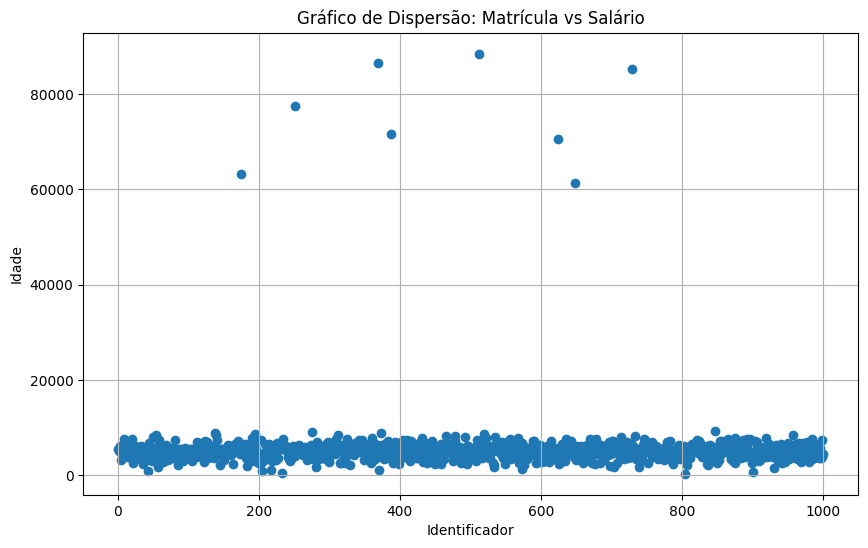

In [13]:
# Exibir Metadados
print("\nTipos de Dados das Colunas:")
print(dataset.dtypes)

# Plotar
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Matricula'], dataset['Salario_Bruto'])
plt.xlabel('Identificador')
plt.ylabel('Idade')
plt.title('Gráfico de Dispersão: Matrícula vs Salário')
plt.grid(True)
plt.show()

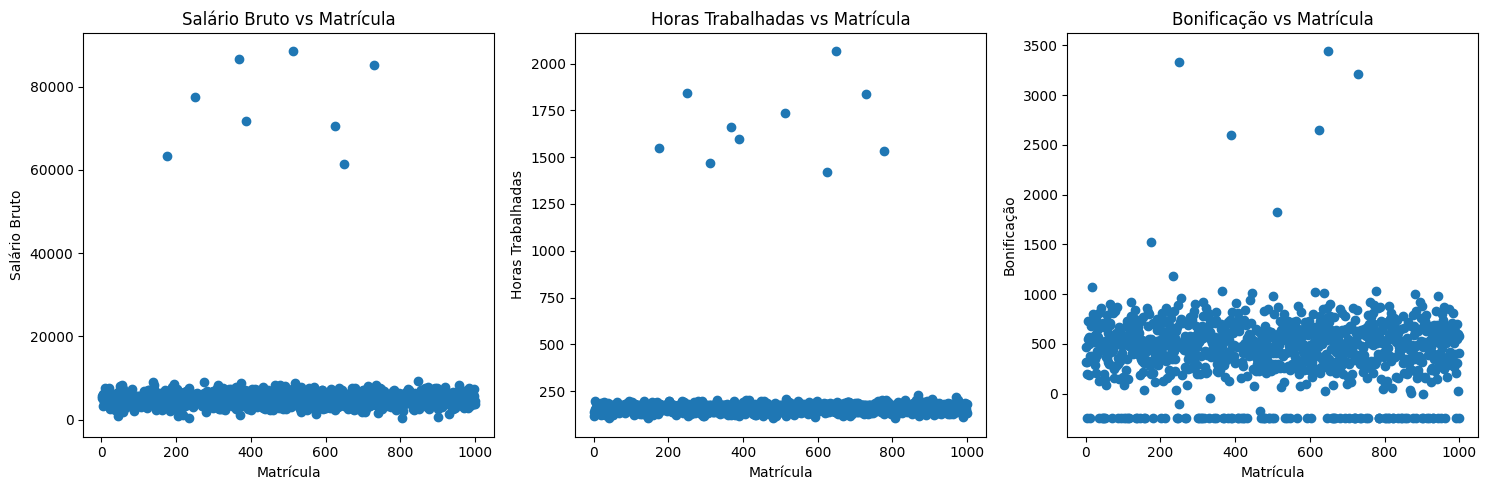

In [14]:
# Criar gráficos de dispersão para 'Salario_Bruto', 'Horas_Trabalhadas' e 'Bonificacao' versus 'Matricula'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(dataset['Matricula'], dataset['Salario_Bruto'])
plt.xlabel('Matrícula')
plt.ylabel('Salário Bruto')
plt.title('Salário Bruto vs Matrícula')

plt.subplot(1, 3, 2)
plt.scatter(dataset['Matricula'], dataset['Horas_Trabalhadas'])
plt.xlabel('Matrícula')
plt.ylabel('Horas Trabalhadas')
plt.title('Horas Trabalhadas vs Matrícula')

plt.subplot(1, 3, 3)
plt.scatter(dataset['Matricula'], dataset['Bonificacao'])
plt.xlabel('Matrícula')
plt.ylabel('Bonificação')
plt.title('Bonificação vs Matrícula')

plt.tight_layout()
plt.show()

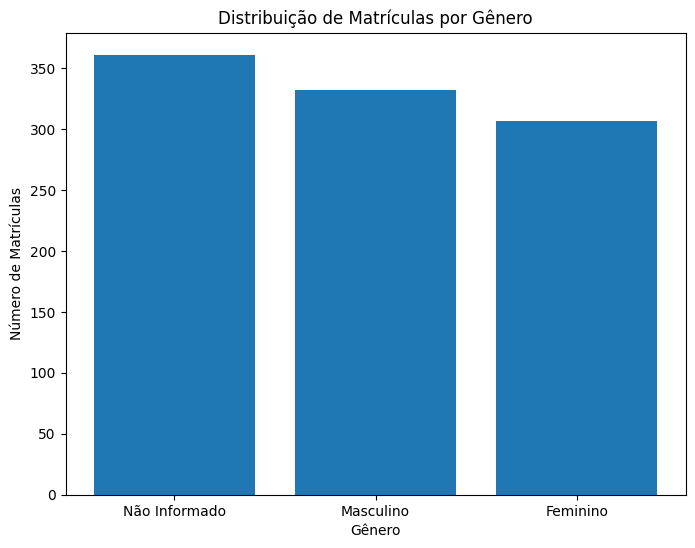

In [15]:
# Contar a quantidade de matrículas por gênero
genero_counts = dataset['Genero'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(genero_counts.index, genero_counts.values)
plt.xlabel('Gênero')
plt.ylabel('Número de Matrículas')
plt.title('Distribuição de Matrículas por Gênero')
plt.show()

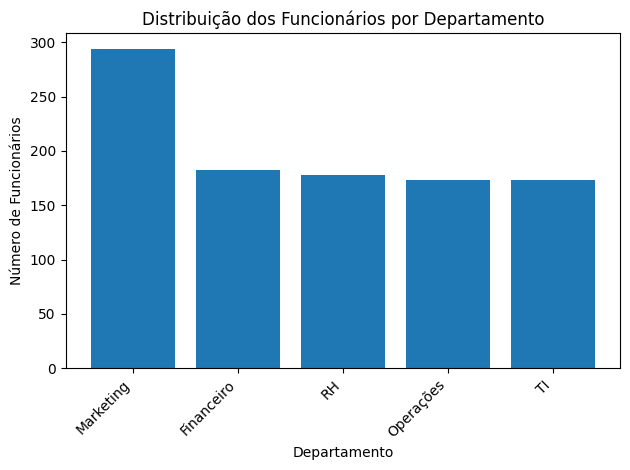

In [16]:
# Gráfico de barras para 'Departamento'
departamento_counts = dataset['Departamento'].value_counts()
plt.bar(departamento_counts.index, departamento_counts.values)
plt.xlabel('Departamento')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição dos Funcionários por Departamento')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

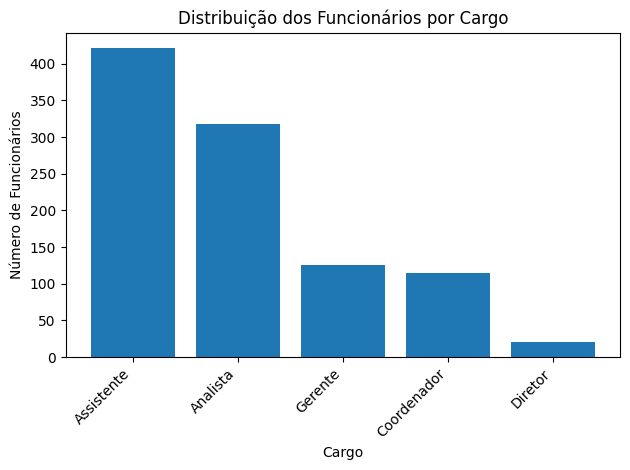

In [17]:
# Gráfico de barras para 'Cargo'
cargo_counts = dataset['Cargo'].value_counts()
plt.bar(cargo_counts.index, cargo_counts.values)
plt.xlabel('Cargo')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição dos Funcionários por Cargo')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

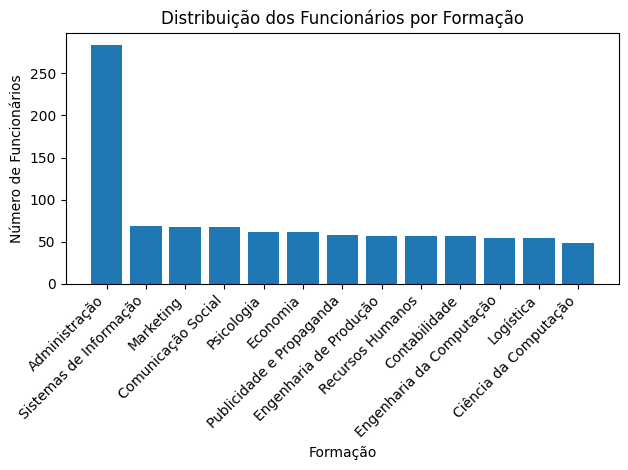

In [18]:
# Gráfico de barras para 'Formacao'
formacao_counts = dataset['Formacao'].value_counts()
plt.bar(formacao_counts.index, formacao_counts.values)
plt.xlabel('Formação')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição dos Funcionários por Formação')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

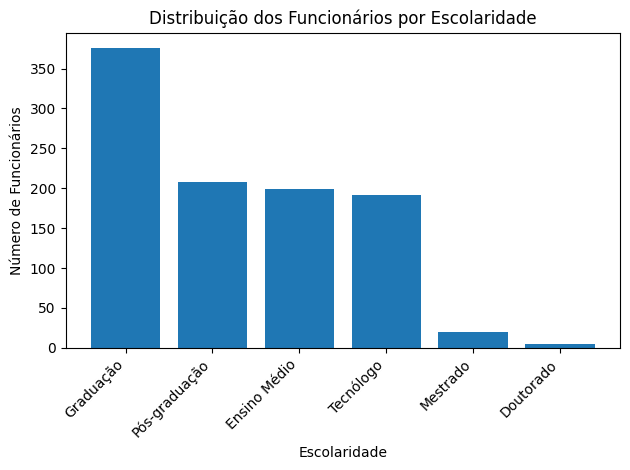

In [19]:
# Gráfico de barras para 'Escolaridade'
escolaridade_counts = dataset['Escolaridade'].value_counts()
plt.bar(escolaridade_counts.index, escolaridade_counts.values)
plt.xlabel('Escolaridade')
plt.ylabel('Número de Funcionários')
plt.title('Distribuição dos Funcionários por Escolaridade')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

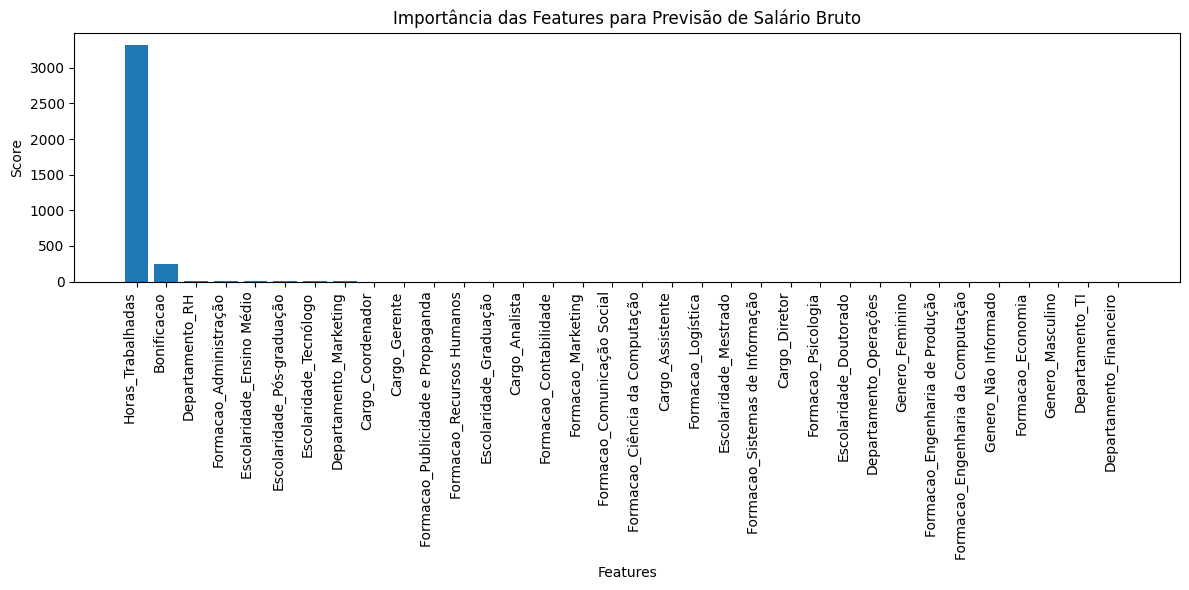

In [20]:
# Selecionar features relevantes para análise, excluindo 'Matricula' e 'Nome'
features = dataset.drop(['Matricula', 'Nome', 'Salario_Bruto'], axis=1)
target = dataset['Salario_Bruto']

# Converter variáveis categóricas para numéricas usando one-hot encoding
features = pd.get_dummies(features)

# Selecionar as melhores features usando SelectKBest e f_regression
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(features, target)

# Criar um DataFrame com as features selecionadas e seus scores
scores = pd.DataFrame({'Feature': features.columns, 'Score': selector.scores_})
scores = scores.sort_values(by='Score', ascending=False)


# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(scores['Feature'], scores['Score'])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Importância das Features para Previsão de Salário Bruto')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Explicação**: Features com alta correlação entre si podem ser consideradas redundantes. Se 'Horas_Trabalhadas' e 'Bonificacao' tiverem alta correlação, deve-se remover uma delas, pois ambas podem estar representando informações semelhantes.

## Etapa 6: Identificação dos Outliers

### Calcular Contaminação

**Explicação**: Para calcular o percentual de contaminação de outliers em um dataset, se pode usar o método InterQuartile Range (IQR) que serve para identificar os valores atípicos em cada coluna numérica. O IQR define outliers como valores que estão:

Abaixo de Q1 - 1.5 x IQR

ou

Acima de Q3 + 1.5 x IQR

In [21]:
# Definir o limite
limite = 1.5

# Selecionar apenas colunas numéricas
numeric_cols = dataset.select_dtypes(include='number')

# Inicializar contador de outliers
outlier_counts = 0
total_values = numeric_cols.size

# Detectar outliers usando o método IQR para cada coluna numérica
for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - limite * IQR
    upper_bound = Q3 + limite * IQR

    # Contar outliers
    col_outliers = numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)][col].count()
    outlier_counts += col_outliers
    print(f"Coluna '{col}' - Outliers: {col_outliers} ({(col_outliers / len(dataset) * 100):.2f}%)")

# Calcular o percentual de contaminação de outliers no dataset
outlier_percentage = (outlier_counts / total_values) * 100

print(f"\nPercentual de contaminação de outliers no dataset: {outlier_percentage:.2f}%")
print(f"Percentual de contaminação de outliers no dataset: {outlier_percentage/100:.4f}%")

Coluna 'Matricula' - Outliers: 0 (0.00%)
Coluna 'Salario_Bruto' - Outliers: 25 (2.50%)
Coluna 'Horas_Trabalhadas' - Outliers: 12 (1.20%)
Coluna 'Bonificacao' - Outliers: 109 (10.90%)

Percentual de contaminação de outliers no dataset: 3.65%
Percentual de contaminação de outliers no dataset: 0.0365%


### Exibição do Boxplot


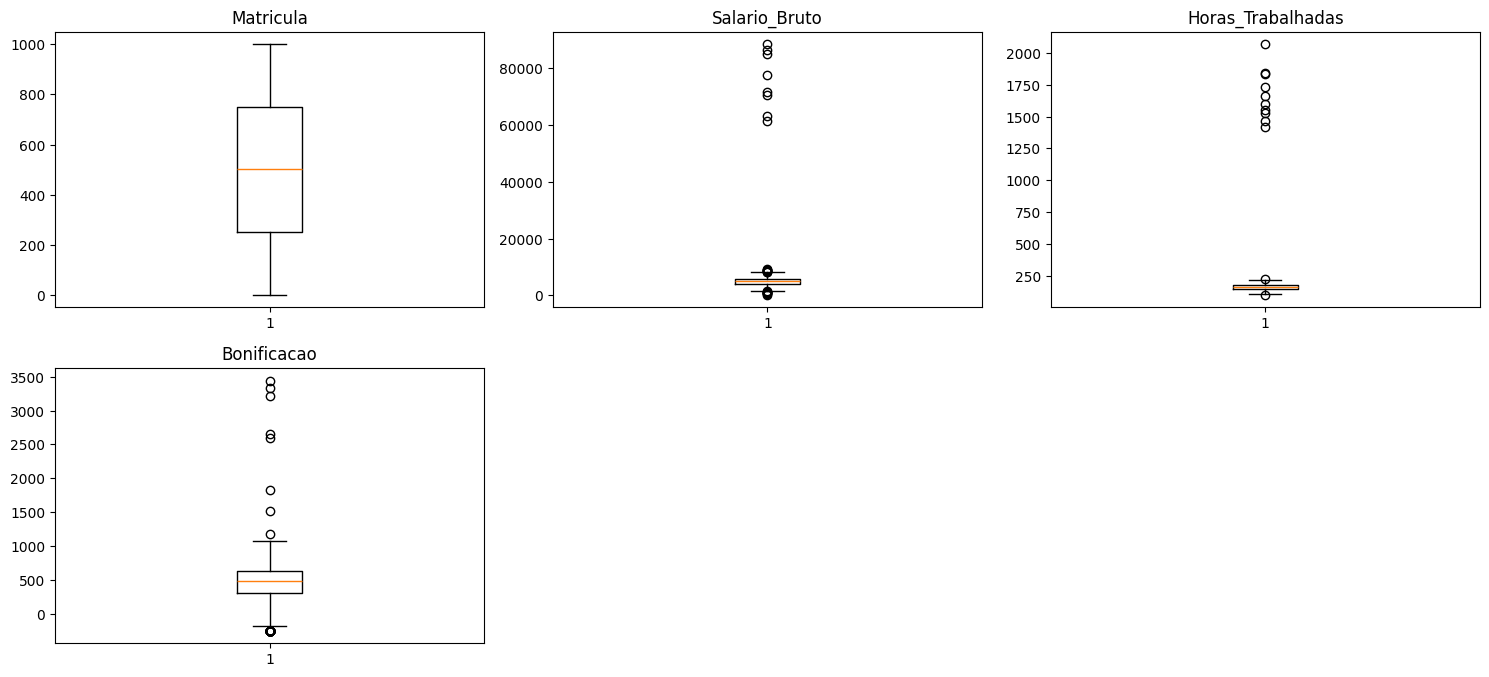

In [22]:
# Criar boxplot para cada coluna numérica para visualizar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(dataset.select_dtypes(include='number').columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(dataset[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**Explicação**: Mediana (linha laranja no meio da caixa): representa a mediana do dado analisado, indicando que o 50% dos dados estão abaixo desse valor e 50% estão acima.

Quartis (Q1 e Q3): a parte inferior da caixa representa o primeiro quartil (Q1), que é o valor abaixo do qual estão 25% dos dados e a parte superior da caixa representa o terceiro quartil (Q3), que é o valor abaixo do qual estão 75% dos dados.

Intervalo Interquartil (IQR): é a altura da caixa representa, que representa a diferença entre Q3 e Q1. Esse intervalo cobre os 50% centrais dos dados.

Limites (Bigodes): são as linhas verticais que se estendem até os valores que estão dentro de 1.5 x IQR de Q1 e Q3, sendo os limites para valores considerados "normais", pois os valores fora desses limites são considerados outliers.

Outliers (círculos acima da caixa): serve para indicar que existem outliers, representando dados que estão bem acima da maioria dos demais, sendo assim, considerados valores extremos. Esses pontos representam indivíduos (observações) muito acima do restante do conjunto de dados.

### Visualização da distribuição dos dados outliers e inliers

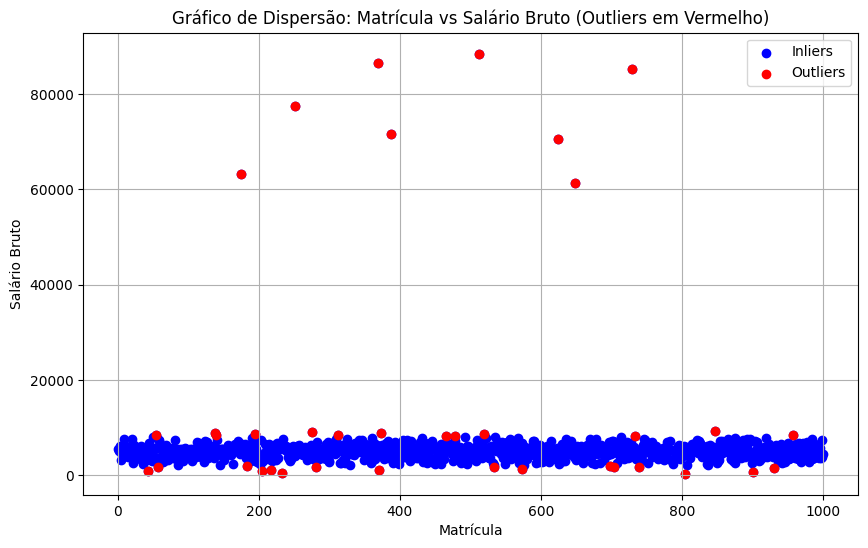

In [23]:
# Criar modelo IsolationForest para detectar outliers
model = IsolationForest(contamination=outlier_percentage/100)  # Ajustar a contaminação conforme necessário
model.fit(dataset[['Salario_Bruto']])

# Prever se cada ponto é um outlier (-1) ou um inlier (1)
outlier_predictions = model.predict(dataset[['Salario_Bruto']])

# Criar um gráfico de dispersão com os outliers destacados
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Matricula'], dataset['Salario_Bruto'], color='blue', label='Inliers')
plt.scatter(dataset['Matricula'][outlier_predictions == -1], dataset['Salario_Bruto'][outlier_predictions == -1], color='red', label='Outliers')
plt.xlabel('Matrícula')
plt.ylabel('Salário Bruto')
plt.title('Gráfico de Dispersão: Matrícula vs Salário Bruto (Outliers em Vermelho)')
plt.legend()
plt.grid(True)
plt.show()

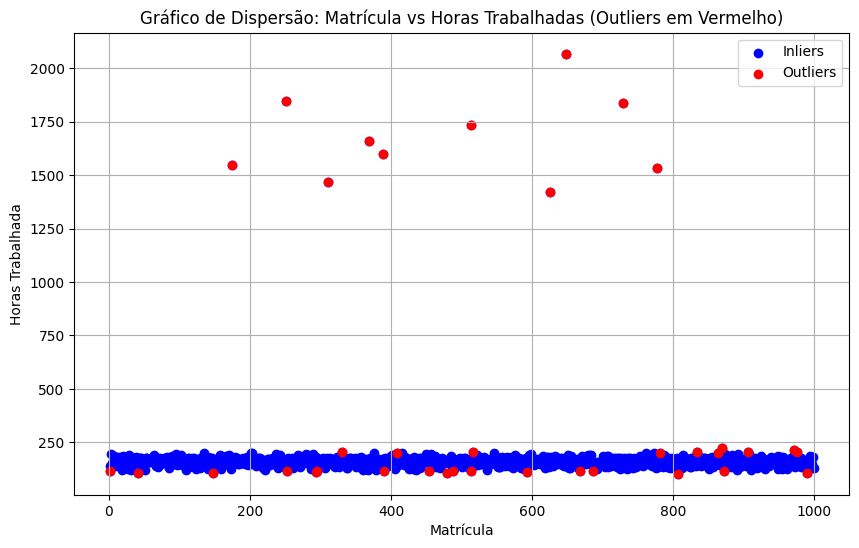

In [24]:
# Criar modelo IsolationForest para detectar outliers
model = IsolationForest(contamination=outlier_percentage/100)  # Ajustar a contaminação conforme necessário
model.fit(dataset[['Horas_Trabalhadas']])

# Prever se cada ponto é um outlier (-1) ou um inlier (1)
outlier_predictions = model.predict(dataset[['Horas_Trabalhadas']])

# Criar gráfico de dispersão com os outliers destacados
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Matricula'], dataset['Horas_Trabalhadas'], color='blue', label='Inliers')
plt.scatter(dataset['Matricula'][outlier_predictions == -1], dataset['Horas_Trabalhadas'][outlier_predictions == -1], color='red', label='Outliers')
plt.xlabel('Matrícula')
plt.ylabel('Horas Trabalhada')
plt.title('Gráfico de Dispersão: Matrícula vs Horas Trabalhadas (Outliers em Vermelho)')
plt.legend()
plt.grid(True)
plt.show()

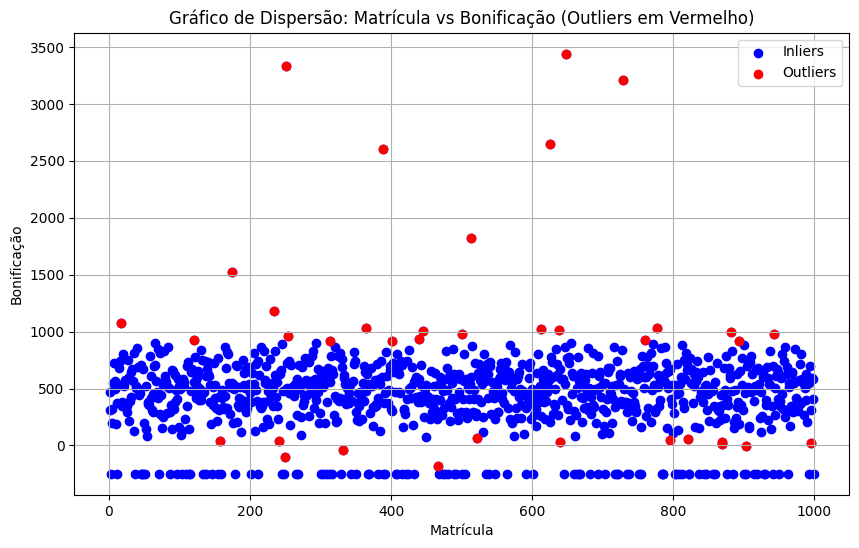

In [25]:
# Criar modelo IsolationForest para detectar outliers
model = IsolationForest(contamination=outlier_percentage/100)  # Ajustar a contaminação conforme necessário
model.fit(dataset[['Bonificacao']])

# Prever se cada ponto é um outlier (-1) ou um inlier (1)
outlier_predictions = model.predict(dataset[['Bonificacao']])

# Criar gráfico de dispersão com os outliers destacados
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Matricula'], dataset['Bonificacao'], color='blue', label='Inliers')
plt.scatter(dataset['Matricula'][outlier_predictions == -1], dataset['Bonificacao'][outlier_predictions == -1], color='red', label='Outliers')
plt.xlabel('Matrícula')
plt.ylabel('Bonificação')
plt.title('Gráfico de Dispersão: Matrícula vs Bonificação (Outliers em Vermelho)')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Contar a quantidade de valores negativos em cada coluna numérica
negative_counts = (dataset.select_dtypes(include='number') < 0).sum()

# Exibir a quantidade de valores negativos por coluna
print("\nQuantidade de valores negativos por coluna:")
print(negative_counts)

# Exibir o total de valores negativos no dataset
total_negative_values = negative_counts.sum()
print(f"\nTotal de valores negativos no dataset: {total_negative_values}")


Quantidade de valores negativos por coluna:
Matricula              0
Salario_Bruto          0
Horas_Trabalhadas      0
Bonificacao          105
dtype: int64

Total de valores negativos no dataset: 105


### Separação dos Outliers dos Inliers

In [27]:
# Selecionar apenas colunas numéricas para a detecção de outliers
numeric_data = dataset.select_dtypes(include='number')

# Configurar e aplicar o Isolation Forest com contaminação
iso_forest = IsolationForest(contamination=0.0365, random_state=42)
outlier_labels = iso_forest.fit_predict(numeric_data)

# Adicionar os rótulos de outliers ao dataset
dataset['is_outlier'] = outlier_labels

# Filtrar apenas os outliers (rótulo -1)
outliers = dataset[dataset['is_outlier'] == -1]

# Exibir os dados que são outliers
print("Dados identificados como outliers:")
print(outliers.to_string())

# Exibir a quantidade e percentual de outliers detectados
outlier_count = len(outliers)
outlier_percentage = (outlier_count / len(dataset)) * 100
print(f"\nTotal de outliers: {outlier_count} ({outlier_percentage:.2f}%)")


Dados identificados como outliers:
     Matricula              Nome         Genero Departamento        Cargo                  Formacao   Escolaridade  Salario_Bruto  Horas_Trabalhadas  Bonificacao  is_outlier
2            3     Funcionário 3  Não Informado    Marketing   Assistente                 Marketing       Mestrado    6127.920000         195.900000      -248.02          -1
16          17    Funcionário 17  Não Informado           RH     Analista             Administração  Pós-graduação    5599.508789         182.100000      1076.29          -1
19          20    Funcionário 20      Masculino    Operações     Analista                 Logística   Ensino Médio    7605.160000         188.200000       803.70          -1
42          43    Funcionário 43       Feminino           TI  Coordenador     Ciência da Computação       Mestrado     833.960000         175.209222       441.53          -1
50          51    Funcionário 51  Não Informado           RH      Diretor                Psicol

In [28]:
# Remover os outliers
try:
    dataset = dataset[dataset['is_outlier'] == 1].drop(columns=['is_outlier'])
except Exception as e:
    print(f"Ocorreu um erro: {e}")

# Exibir o dataset sem os outliers
print("Dataset sem os outliers:")
print(dataset.to_string())

# Exibir informações gerais do dataset
print("\nInformações Gerais do Dataset:")
print(dataset.info())

Dataset sem os outliers:
     Matricula             Nome         Genero Departamento        Cargo                  Formacao   Escolaridade  Salario_Bruto  Horas_Trabalhadas  Bonificacao
0            1    Funcionário 1       Feminino    Operações      Diretor    Engenharia de Produção  Pós-graduação    5599.508789         139.900000       315.92
1            2    Funcionário 2       Feminino   Financeiro     Analista             Administração  Pós-graduação    5128.930000         117.100000       467.94
3            4    Funcionário 4  Não Informado    Marketing  Coordenador                 Marketing      Tecnólogo    5844.480000         155.900000       199.47
4            5    Funcionário 5  Não Informado    Marketing      Gerente        Comunicação Social      Graduação    3207.520000         151.000000       318.89
5            6    Funcionário 6      Masculino           RH      Diretor                Psicologia       Mestrado    4249.390000         156.000000       553.01
6        

## Etapa 7: Clusterização

### Técnicas para identificação do hiperparametro K

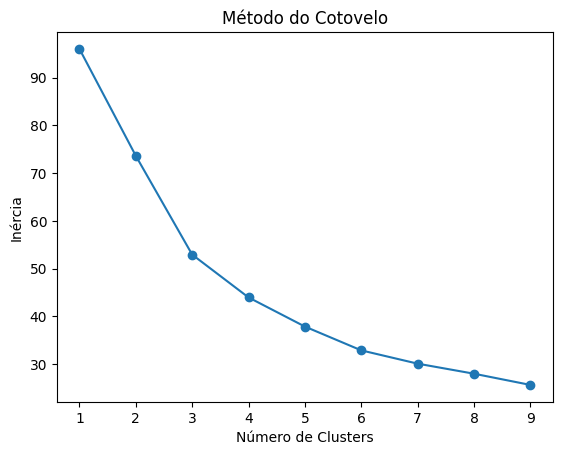

O número ideal de clusters (método do cotovelo) é: 2


In [29]:
# Selecionar as colunas numéricas relevantes para a clusterização
features_cluster = dataset[['Salario_Bruto', 'Horas_Trabalhadas', 'Bonificacao']]

# Normalizar os dados
scaler = MinMaxScaler()
features_cluster = scaler.fit_transform(features_cluster)

# Encontrar o número ótimo de clusters usando a técnica do cotovelo
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_cluster)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Exemplo de heurística (pode ser ajustado conforme necessário)
elbow_point = np.argmax(np.diff(inertia) / inertia[:-1] * -1) + 1

print(f"O número ideal de clusters (método do cotovelo) é: {elbow_point}")

**Explicação**: Encontrar o número de clusters com o "cotovelo" mais eficaz, pois o ponto onde a curva começa a se achatar é a melhor indicação visual, porém pode-se usar uma heurística, por exemplo, a maior diferença na redução da inércia entre dois clusters consecutivos.

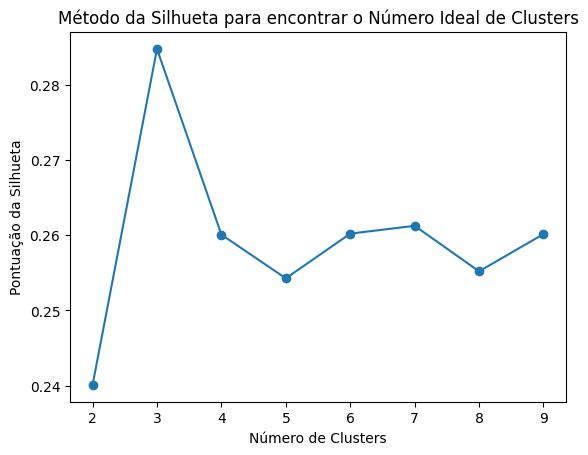

O número ideal de clusters é: 3


In [30]:
# Selecionar as colunas numéricas relevantes para a clusterização
features_cluster = dataset[['Salario_Bruto', 'Horas_Trabalhadas', 'Bonificacao']]

# Normalizar os dados
scaler = MinMaxScaler()
features_cluster = scaler.fit_transform(features_cluster)

# Encontrar o número ótimo de clusters usando a técnica de silhueta
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(features_cluster)
    silhouette_avg = silhouette_score(features_cluster, labels)
    silhouette_scores.append(silhouette_avg)

# Plotar os resultados da silhueta
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.title('Método da Silhueta para encontrar o Número Ideal de Clusters')
plt.show()

# Encontrar o número de clusters com a maior pontuação de silhueta
best_n_clusters = np.argmax(silhouette_scores) + 2

print(f"O número ideal de clusters é: {best_n_clusters}")

### Algoritmo de Clusterização (KMeans)

In [31]:
# Definir os hiperparâmetros do KMeans
n_clusters = 3  # Número de clusters (K)
max_iter = 200  # Número máximo de iterações
init = 'k-means++'  # Método de inicialização dos centróides
n_init = 10  # Número de vezes que o algoritmo KMeans será executado com diferentes inicializações
algorithm = 'lloyd' # Algoritmo para calcular os centróides ('lloyd' ou 'elkan' ou 'auto')

# Criar o modelo KMeans com os hiperparâmetros definidos
kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, init=init, n_init=n_init, algorithm=algorithm, random_state=42)

# Selecionar as colunas numéricas relevantes para a clusterização
features_cluster = dataset[['Salario_Bruto', 'Horas_Trabalhadas', 'Bonificacao']]

# Normalizar os dados (opcional, mas recomendado para KMeans)
scaler = MinMaxScaler()
features_cluster = scaler.fit_transform(features_cluster)

# Executar a clusterização
kmeans.fit(features_cluster)

# Obter as etiquetas dos clusters para cada ponto de dados
labels = kmeans.labels_

# Obter as coordenadas dos centróides dos clusters
centroids = kmeans.cluster_centers_

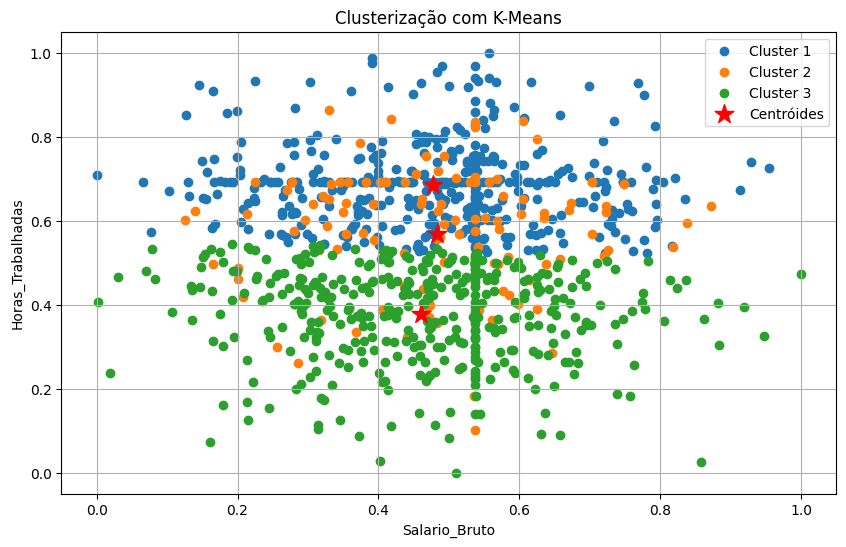

In [32]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))

# Plotar os dados de cada cluster com cores diferentes
for i in range(n_clusters):
  plt.scatter(features_cluster[labels == i, 0], features_cluster[labels == i, 1], label=f'Cluster {i+1}')

# Plotar os centróides dos clusters com um marcador especial (estrela)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', label='Centróides')

plt.xlabel('Salario_Bruto')
plt.ylabel('Horas_Trabalhadas')
plt.title('Clusterização com K-Means')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Exibir os dados referentes a cada cluster de forma dinâmica (opcional)
for i in range(3):
  print(f"\nDados do Cluster {i+1}:")
  cluster_data = dataset[labels == i]
  print(cluster_data.describe().to_string())


Dados do Cluster 1:
        Matricula  Salario_Bruto  Horas_Trabalhadas  Bonificacao
count  442.000000     442.000000         442.000000   442.000000
mean   491.615385    5112.444761         174.587294   522.365837
std    280.375108    1335.265052           9.739121   186.313535
min      7.000000    1188.140000         158.300000   147.550000
25%    254.500000    4239.425000         167.825000   381.840000
50%    479.000000    5297.610000         175.209222   520.680000
75%    734.750000    5780.980000         178.425000   651.047500
max    999.000000    9020.860000         206.300000  1032.550000

Dados do Cluster 2:
        Matricula  Salario_Bruto  Horas_Trabalhadas  Bonificacao
count  116.000000     116.000000         116.000000   116.000000
mean   496.620690    5151.521954         162.865609  -161.841983
std    284.323137    1252.531142          14.309619   148.801350
min     12.000000    2213.780000         115.900000  -248.020000
25%    248.750000    4241.257500         155.350

In [34]:
# Exibir os dados dos clusters
for i in range(3):  # Itere pelos clusters (assumindo 3 clusters)
  print(f"\nHead do Cluster {i+1}:")
  cluster_data = dataset[labels == i].head()
  print(cluster_data.to_string())


Head do Cluster 1:
    Matricula            Nome         Genero Departamento       Cargo                  Formacao  Escolaridade  Salario_Bruto  Horas_Trabalhadas  Bonificacao
6           7   Funcionário 7  Não Informado    Marketing     Diretor        Comunicação Social  Ensino Médio        5379.21              188.4       725.94
8           9   Funcionário 9      Masculino    Operações  Assistente    Engenharia de Produção  Ensino Médio        7661.99              173.6       494.84
12         13  Funcionário 13  Não Informado           TI     Gerente  Engenharia da Computação      Mestrado        5495.80              179.8       716.19
21         22  Funcionário 22       Feminino   Financeiro  Assistente             Administração      Mestrado        2625.97              175.6       522.46
22         23  Funcionário 23       Feminino    Marketing     Gerente                 Marketing     Tecnólogo        6440.84              163.7       578.47

Head do Cluster 2:
    Matricula     

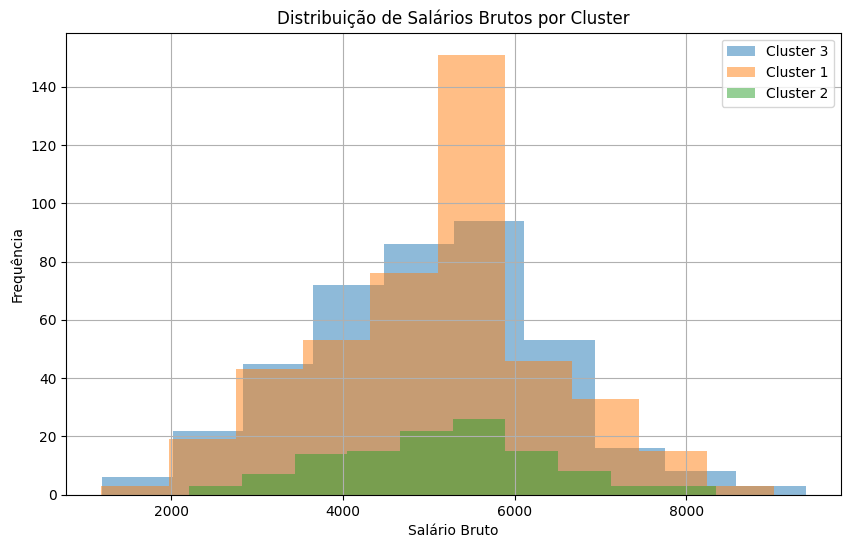

In [35]:
# Adicionar a coluna de clusters ao dataset
dataset['Cluster'] = labels

# Criar o gráfico de distribuição dos salários brutos por cluster
plt.figure(figsize=(10, 6))
for cluster in dataset['Cluster'].unique():
  plt.hist(dataset[dataset['Cluster'] == cluster]['Salario_Bruto'], alpha=0.5, label=f'Cluster {cluster + 1}')

plt.xlabel('Salário Bruto')
plt.ylabel('Frequência')
plt.title('Distribuição de Salários Brutos por Cluster')
plt.legend()
plt.grid(True)
plt.show()

## Etapa 8: Rotulagem

In [36]:
# Adicionar a coluna 'Nivel' ao dataset com base nos clusters
dataset['Nivel'] = dataset['Cluster'].map({
    0: 'Sênior',
    2: 'Pleno',
    1: 'Junior'
})

# Selecionar as colunas desejadas e na ordem especificada
dataset = dataset[['Nivel', 'Matricula', 'Nome', 'Genero', 'Departamento', 'Cargo', 'Formacao', 'Escolaridade', 'Salario_Bruto', 'Horas_Trabalhadas', 'Bonificacao']]

In [37]:
# Exibir o dataset com a nova coluna e ordem de colunas
print(dataset.head().to_string())

   Nivel  Matricula           Nome         Genero Departamento        Cargo                Formacao   Escolaridade  Salario_Bruto  Horas_Trabalhadas  Bonificacao
0  Pleno          1  Funcionário 1       Feminino    Operações      Diretor  Engenharia de Produção  Pós-graduação    5599.508789              139.9       315.92
1  Pleno          2  Funcionário 2       Feminino   Financeiro     Analista           Administração  Pós-graduação    5128.930000              117.1       467.94
3  Pleno          4  Funcionário 4  Não Informado    Marketing  Coordenador               Marketing      Tecnólogo    5844.480000              155.9       199.47
4  Pleno          5  Funcionário 5  Não Informado    Marketing      Gerente      Comunicação Social      Graduação    3207.520000              151.0       318.89
5  Pleno          6  Funcionário 6      Masculino           RH      Diretor              Psicologia       Mestrado    4249.390000              156.0       553.01


In [38]:
# Atualizar 'folha.csv' com os dados do dataset
dataset.to_csv('folha.csv', index=False)

## Etapa 9: Preprocess

In [39]:
# Carregar os dados do 'folha.csv' para o dataset
try:
    dataset = pd.read_csv('folha.csv')
except FileNotFoundError:
    print("Arquivo 'folha.csv' não encontrado.")
    # Se o arquivo não for encontrado, pode ser necessário criar um novo dataset ou fornecer outro arquivo CSV.

# Listar os dados do dataset
print(dataset.head().to_string())

   Nivel  Matricula           Nome         Genero Departamento        Cargo                Formacao   Escolaridade  Salario_Bruto  Horas_Trabalhadas  Bonificacao
0  Pleno          1  Funcionário 1       Feminino    Operações      Diretor  Engenharia de Produção  Pós-graduação    5599.508789              139.9       315.92
1  Pleno          2  Funcionário 2       Feminino   Financeiro     Analista           Administração  Pós-graduação    5128.930000              117.1       467.94
2  Pleno          4  Funcionário 4  Não Informado    Marketing  Coordenador               Marketing      Tecnólogo    5844.480000              155.9       199.47
3  Pleno          5  Funcionário 5  Não Informado    Marketing      Gerente      Comunicação Social      Graduação    3207.520000              151.0       318.89
4  Pleno          6  Funcionário 6      Masculino           RH      Diretor              Psicologia       Mestrado    4249.390000              156.0       553.01


In [40]:
# Converter variáveis categóricas para numéricas usando one-hot encoding
dataset = pd.get_dummies(dataset, columns=['Genero', 'Departamento', 'Cargo', 'Formacao', 'Escolaridade'])

# Normalizar os dados numéricos usando MinMaxScaler
numerical_features = ['Salario_Bruto', 'Horas_Trabalhadas', 'Bonificacao']
scaler = MinMaxScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

In [41]:
# Listar os dados do dataset transformado
print(dataset.head().to_string())

   Nivel  Matricula           Nome  Salario_Bruto  Horas_Trabalhadas  Bonificacao  Genero_Feminino  Genero_Masculino  Genero_Não Informado  Departamento_Financeiro  Departamento_Marketing  Departamento_Operações  Departamento_RH  Departamento_TI  Cargo_Analista  Cargo_Assistente  Cargo_Coordenador  Cargo_Diretor  Cargo_Gerente  Formacao_Administração  Formacao_Ciência da Computação  Formacao_Comunicação Social  Formacao_Contabilidade  Formacao_Economia  Formacao_Engenharia da Computação  Formacao_Engenharia de Produção  Formacao_Logística  Formacao_Marketing  Formacao_Psicologia  Formacao_Publicidade e Propaganda  Formacao_Recursos Humanos  Formacao_Sistemas de Informação  Escolaridade_Doutorado  Escolaridade_Ensino Médio  Escolaridade_Graduação  Escolaridade_Mestrado  Escolaridade_Pós-graduação  Escolaridade_Tecnólogo
0  Pleno          1  Funcionário 1       0.537611           0.340616     0.393393             True             False                 False                    False      

In [42]:
# Gerar 'folha_n.csv' com os dados do dataset
dataset.to_csv('folha_n.csv', index=False)

**Explicação**: É possível discretivar os dados categóricos

*Discretizar a variável 'Salario_Bruto' em intervalos*

bins = [0, 3000, 6000, 9000, float('inf')]

Definir os intervalos desejados

labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']

Definir os rótulos para cada intervalo

dataset['Salario_Discretizado'] = pd.cut(dataset['Salario_Bruto'], bins=bins, labels=labels, include_lowest=True)


*Discretizar a variável 'Horas_Trabalhadas' em intervalos*

bins_horas = [0, 160, 180, 200, float('inf')]

Definir os intervalos desejados

labels_horas = ['Parcial', 'Normal', 'Extra', 'Muita Extra']

Definir os rótulos para cada intervalo

dataset['Horas_Discretizadas'] = pd.cut(dataset['Horas_Trabalhadas'], bins=bins_horas, labels=labels_horas, include_lowest=True)


*Discretizar a variável 'Bonificacao' em intervalos*

bins_bonificacao = [0, 500, 1000, 1500, float('inf')]

Definir os intervalos desejados

labels_bonificacao = ['Baixa', 'Média', 'Alta', 'Muito Alta']

Definir os rótulos para cada intervalo

dataset['Bonificacao_Discretizada'] = pd.cut(dataset['Bonificacao'], bins=bins_bonificacao, labels=labels_bonificacao, include_lowest=True)

In [43]:
# Listar os nomes dos metadados do dataset
print(dataset.columns.tolist())

['Nivel', 'Matricula', 'Nome', 'Salario_Bruto', 'Horas_Trabalhadas', 'Bonificacao', 'Genero_Feminino', 'Genero_Masculino', 'Genero_Não Informado', 'Departamento_Financeiro', 'Departamento_Marketing', 'Departamento_Operações', 'Departamento_RH', 'Departamento_TI', 'Cargo_Analista', 'Cargo_Assistente', 'Cargo_Coordenador', 'Cargo_Diretor', 'Cargo_Gerente', 'Formacao_Administração', 'Formacao_Ciência da Computação', 'Formacao_Comunicação Social', 'Formacao_Contabilidade', 'Formacao_Economia', 'Formacao_Engenharia da Computação', 'Formacao_Engenharia de Produção', 'Formacao_Logística', 'Formacao_Marketing', 'Formacao_Psicologia', 'Formacao_Publicidade e Propaganda', 'Formacao_Recursos Humanos', 'Formacao_Sistemas de Informação', 'Escolaridade_Doutorado', 'Escolaridade_Ensino Médio', 'Escolaridade_Graduação', 'Escolaridade_Mestrado', 'Escolaridade_Pós-graduação', 'Escolaridade_Tecnólogo']


In [44]:
# Definir atributos como features, target e metadados
features = dataset.drop(['Nivel', 'Matricula', 'Nome'], axis=1)
target = dataset['Nivel']
meta = dataset[['Matricula', 'Nome']]

# Converter variáveis categóricas para numéricas usando one-hot encoding
features = pd.get_dummies(features)

In [45]:
# Exibir as regras (target, meta e features) dos campos do dataset
print("\nRegras dos Campos do Dataset:")
print("--------------------------")
print("\nTarget (variável alvo):")
print(target.name)
print("\nMetadados:")
for column in meta.columns:
    print(column)
print("\nFeatures (variáveis preditoras):")
for column in features.columns:
    print(column)


Regras dos Campos do Dataset:
--------------------------

Target (variável alvo):
Nivel

Metadados:
Matricula
Nome

Features (variáveis preditoras):
Salario_Bruto
Horas_Trabalhadas
Bonificacao
Genero_Feminino
Genero_Masculino
Genero_Não Informado
Departamento_Financeiro
Departamento_Marketing
Departamento_Operações
Departamento_RH
Departamento_TI
Cargo_Analista
Cargo_Assistente
Cargo_Coordenador
Cargo_Diretor
Cargo_Gerente
Formacao_Administração
Formacao_Ciência da Computação
Formacao_Comunicação Social
Formacao_Contabilidade
Formacao_Economia
Formacao_Engenharia da Computação
Formacao_Engenharia de Produção
Formacao_Logística
Formacao_Marketing
Formacao_Psicologia
Formacao_Publicidade e Propaganda
Formacao_Recursos Humanos
Formacao_Sistemas de Informação
Escolaridade_Doutorado
Escolaridade_Ensino Médio
Escolaridade_Graduação
Escolaridade_Mestrado
Escolaridade_Pós-graduação
Escolaridade_Tecnólogo


## Etapa 10: Balanceamento dos Dados

In [46]:
# Contar a quantidade de exemplos por classe
target_counts = target.value_counts()

print("\nQuantidade de Exemplos por Classe Alvo:")
target_counts


Quantidade de Exemplos por Classe Alvo:


,count
Nivel,
Sênior,442
Pleno,405
Junior,116


In [47]:
# Contar a quantidade de exemplos por classe no atributo 'Pontuacao_Credito'
target_counts = target.value_counts()

# Encontrar a classe minoritária
minority_class = target_counts.idxmin()

# Encontrar a quantidade de exemplos da classe minoritária
n_samples_minority = target_counts.min()

# Criar um DataFrame vazio para armazenar o conjunto de dados balanceado
balanced_dataset = pd.DataFrame()

# Balancear os dados para cada classe
for class_label in target_counts.index:
  # Filtrar os dados para a classe atual
  class_data = dataset[dataset['Nivel'] == class_label]

  # Se a classe for a minoritária, manter todos os exemplos
  if class_label == minority_class:
    balanced_dataset = pd.concat([balanced_dataset, class_data])
  else:
    # Se a classe for a majoritária, fazer o downsample para o número de exemplos da classe minoritária
    downsampled_class_data = resample(class_data,
                                     replace=False,
                                     n_samples=n_samples_minority,
                                     random_state=42)
    balanced_dataset = pd.concat([balanced_dataset, downsampled_class_data])

# Redefinir o índice do conjunto de dados balanceado
balanced_dataset = balanced_dataset.reset_index(drop=True)

# Exibir a quantidade de exemplos por classe no conjunto de dados balanceado
print("\nQuantidade de Exemplos por Classe Alvo (Dataset Balanceado):")
print(balanced_dataset['Nivel'].value_counts())


Quantidade de Exemplos por Classe Alvo (Dataset Balanceado):
Nivel
Sênior    116
Pleno     116
Junior    116
Name: count, dtype: int64


## Etapa 11: Separação dos Dados para Treinamento/Teste e Validação

In [48]:
# Separar os dados em treino e teste (80/20)
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Salvar os datasets em novos arquivos CSV
train_data.to_csv('folha_n_train.csv', index=False)
test_data.to_csv('folha_n_test.csv', index=False)

# Exibir informações
print("Datasets de treino e teste gerados com sucesso!")
print(f"Arquivo de treino: folha_n_train.csv ({len(train_data)} registros)")
print(f"Arquivo de teste: folha_n_test.csv ({len(test_data)} registros)")

Datasets de treino e teste gerados com sucesso!
Arquivo de treino: folha_n_train.csv (770 registros)
Arquivo de teste: folha_n_test.csv (193 registros)


In [49]:
# Carregar o dataset de treino
folha_n_train = pd.read_csv('folha_n_train.csv')

# Listar todos os dados
print("Dados do folha_n_train:")
print(folha_n_train.to_string())

# Exibir os metadados e informações estatísticas
print("\nExploração dos Metadados do folha_n_train:")

# 1. Exibir as primeiras linhas do dataset
print("\n1. Primeiras Linhas do Dataset:")
print(folha_n_train.head().to_string())

# 2. Obter informações gerais do dataset
print("\n2. Informações Gerais do Dataset:")
print(folha_n_train.info())

# 3. Exibir o número de linhas e colunas
print("\n3. Dimensões do Dataset (Linhas, Colunas):")
print(folha_n_train.shape)

# 4. Exibir o nome das colunas
print("\n4. Nomes das Colunas:")
print(folha_n_train.columns.tolist())

# 5. Checar dados ausentes por coluna
print("\n5. Dados Ausentes por Coluna:")
print(folha_n_train.isnull().sum())

# 6. Exibir tipos de dados de cada coluna
print("\n6. Tipos de Dados das Colunas:")
print(folha_n_train.dtypes)

# 7. Exibir valores únicos por coluna para colunas categóricas
print("\n7. Valores Únicos por Coluna Categórica:")
for col in folha_n_train.select_dtypes(include=['object']).columns:
    print(f"{col}: {folha_n_train[col].nunique()} valores únicos")

# 8. Exibir estatísticas descritivas para colunas numéricas
print("\n8. Estatísticas Descritivas das Colunas Numéricas:")
print(folha_n_train.describe().to_string())

Dados do folha_n_train:
      Nivel  Matricula             Nome  Salario_Bruto  Horas_Trabalhadas  Bonificacao  Genero_Feminino  Genero_Masculino  Genero_Não Informado  Departamento_Financeiro  Departamento_Marketing  Departamento_Operações  Departamento_RH  Departamento_TI  Cargo_Analista  Cargo_Assistente  Cargo_Coordenador  Cargo_Diretor  Cargo_Gerente  Formacao_Administração  Formacao_Ciência da Computação  Formacao_Comunicação Social  Formacao_Contabilidade  Formacao_Economia  Formacao_Engenharia da Computação  Formacao_Engenharia de Produção  Formacao_Logística  Formacao_Marketing  Formacao_Psicologia  Formacao_Publicidade e Propaganda  Formacao_Recursos Humanos  Formacao_Sistemas de Informação  Escolaridade_Doutorado  Escolaridade_Ensino Médio  Escolaridade_Graduação  Escolaridade_Mestrado  Escolaridade_Pós-graduação  Escolaridade_Tecnólogo
0     Pleno        641  Funcionário 641       0.469624           0.500497     0.577532            False              True                 Fa

## Etapa 12: Competição dos Modelos

In [50]:
# Criar modelo SVM com hiperparâmetros específicos
svm_model = SVC(
    C=1.0,  # Parâmetro de regularização (custo da classificação incorreta)
    kernel='rbf',  # Kernel para o modelo (radial basis function)
    degree=3,  # Grau do polinômio para o kernel (relevante para kernel='poly')
    gamma='scale',  # Coeficiente do kernel (relevante para kernel='rbf', 'poly', 'sigmoid')
    coef0=0.0,  # Termo independente para o kernel (relevante para kernel='poly', 'sigmoid')
    shrinking=True,  # Utilização do shrinking heuristic para otimizar a solução
    probability=False,  # Calcular probabilidades de classe
    tol=0.001,  # Tolerância para a otimização
    cache_size=1000,  # Tamanho do cache em MB
    class_weight=None,  # Pesos para as classes (pode ser usado para lidar com classes desbalanceadas)
    verbose=False,  # Mostrar mensagens durante a execução
    max_iter=200,  # Número máximo de iterações para a otimização (-1 significa ilimitado)
    decision_function_shape='ovr',  # Formato da função de decisão ('ovo' para one-vs-one, 'ovr' para one-vs-rest)
    break_ties=False,  # Quebrar empates com maior precisão (relevante para classificação multiclasse)
    random_state=None  # Semente aleatória para reprodutibilidade
)

In [51]:
# Criar um modelo MLP com hiperparâmetros específicos
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # Número de neurônios em cada camada oculta
    activation='relu',  # Função de ativação
    solver='adam',  # Algoritmo de otimização
    alpha=0.0001,  # Termo de regularização L2
    batch_size='auto',  # Tamanho do batch para o treinamento
    learning_rate='constant',  # Taxa de aprendizado
    learning_rate_init=0.001,  # Taxa de aprendizado inicial
    power_t=0.5,  # Parâmetro para o algoritmo de otimização 'sgd'
    max_iter=1000,  # Número máximo de iterações
    shuffle=True,  # Embaralhar os dados a cada época
    random_state=None,  # Semente aleatória
    tol=0.0001,  # Tolerância para o critério de parada
    verbose=False,  # Mostrar mensagens durante o treinamento
    warm_start=False,  # Reutilizar a solução da inicialização anterior
    momentum=0.9,  # Parâmetro para o algoritmo de otimização 'sgd'
    nesterovs_momentum=True,  # Utilizar o momentum de Nesterov
    early_stopping=False,  # Parar o treinamento precocemente
    validation_fraction=0.1,  # Fração de dados para validação
    beta_1=0.9,  # Parâmetro para o algoritmo de otimização 'adam'
    beta_2=0.999,  # Parâmetro para o algoritmo de otimização 'adam'
    epsilon=1e-08,  # Parâmetro para o algoritmo de otimização 'adam'
    n_iter_no_change=10,  # Número máximo de épocas sem melhoria
    max_fun=15000  # Número máximo de chamadas para a função de custo
)

In [52]:
# Definir as features e o target
X = features
y = target

# Definir os modelos
models = {
    'SVM': svm_model,
    'MLP': mlp_model
}

# Definir o número de folds para a cross-validation
n_folds = 3

# Criar um dicionário para armazenar as métricas de cada modelo
model_metrics = {}

# Realizar a cross-validation para cada modelo
for model_name, model in models.items():
  cv_scores = cross_val_score(model, X, y, cv=n_folds, scoring='accuracy')
  model_metrics[model_name] = {
      'accuracy': cv_scores.mean()
  }

  # Treinar o modelo com todos os dados de treino para obter a matriz de confusão
  model.fit(X, y)
  y_pred = model.predict(X)
  model_metrics[model_name]['confusion_matrix'] = confusion_matrix(y, y_pred)

# Encontrar o modelo com a maior acurácia
best_model_name = max(model_metrics, key=lambda k: model_metrics[k]['accuracy'])
best_model = models[best_model_name]

# Salvar o modelo campeão
with open('best_model.pkl', 'wb') as f:
  pickle.dump(best_model, f)

# Exibir as métricas de cada modelo
print("Métricas dos Modelos:")
for model_name, metrics in model_metrics.items():
  print(f"\nModelo: {model_name}")
  print(f"Acurácia: {metrics['accuracy']:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Métricas dos Modelos:

Modelo: SVM
Acurácia: 0.8380

Modelo: MLP
Acurácia: 0.9273


## Etapa 13: Teste do Modelo Campeão

In [53]:
# Carregar o modelo treinado
with open('best_model.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

# Carregar o dataset de teste
test_data = pd.read_csv('folha_n_test.csv')

# Separar features e target no dataset de teste
X_test = test_data.drop(['Nivel', 'Matricula', 'Nome'], axis=1)
y_test = test_data['Nivel']

# Converter variáveis categóricas para numéricas usando one-hot encoding
X_test = pd.get_dummies(X_test)

# Normalizar os dados de teste usando o mesmo scaler usado no treinamento
numerical_features = ['Salario_Bruto', 'Horas_Trabalhadas', 'Bonificacao']
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Fazer a previsão com o modelo carregado
y_pred = loaded_model.predict(X_test)

# Avaliar o desempenho do modelo com os dados de teste
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo no conjunto de teste: {accuracy:.4f}")

# Verificar o resultado para um exemplo específico
example_index = 0  # Índice do exemplo que você deseja verificar
example_features = X_test.iloc[[example_index]]
example_target = y_test.iloc[example_index]

predicted_level = loaded_model.predict(example_features)[0]

print(f"Exemplo {example_index}:")
print(f"Características do exemplo:\n{example_features.to_string()}")
print(f"Nível real: {example_target}")
print(f"Nível previsto: {predicted_level}")


Acurácia do modelo no conjunto de teste: 0.4197
Exemplo 0:
Características do exemplo:
   Salario_Bruto  Horas_Trabalhadas  Bonificacao  Genero_Feminino  Genero_Masculino  Genero_Não Informado  Departamento_Financeiro  Departamento_Marketing  Departamento_Operações  Departamento_RH  Departamento_TI  Cargo_Analista  Cargo_Assistente  Cargo_Coordenador  Cargo_Diretor  Cargo_Gerente  Formacao_Administração  Formacao_Ciência da Computação  Formacao_Comunicação Social  Formacao_Contabilidade  Formacao_Economia  Formacao_Engenharia da Computação  Formacao_Engenharia de Produção  Formacao_Logística  Formacao_Marketing  Formacao_Psicologia  Formacao_Publicidade e Propaganda  Formacao_Recursos Humanos  Formacao_Sistemas de Informação  Escolaridade_Doutorado  Escolaridade_Ensino Médio  Escolaridade_Graduação  Escolaridade_Mestrado  Escolaridade_Pós-graduação  Escolaridade_Tecnólogo
0      -0.144742           -1.04433     0.173013            False             False                  True          